In [1]:
%load_ext autoreload
%autoreload 2
import generator
import time
import sys 
from arcworld.general_utils import plot_task, plot_grid, randomly_add_shape_to_world
import numpy as np
from arcworld.shapes.base import Shape

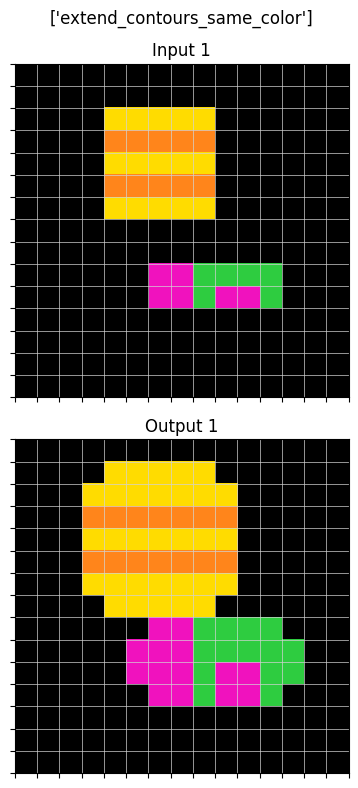

In [7]:
# At each run, the generator will create a new task with a different combination of transformations, as described in the config file.

config = {
    "min_n_shapes_per_grid": 2,
    "max_n_shapes_per_grid": 2,
    "n_examples": 1,
    "min_grid_size": 15,
    "allowed_combinations": [["extend_contours_same_color"]],
    "max_grid_size": 15,
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_less_than_11_rows", 
                                      "is_shape_less_than_11_cols"],
}

gen = generator.generator(config, debug_mode=False) # Initialize the generator with the config
task = gen.generate_single_task() # Generate a single task
plot_task(task, size = (8, 8))

In [3]:
from arcworld.shapes.base import Shape
x = np.random.randint(0, 9, (10, 10))
x = np.array([[1, 1, 1, 0, 0, 0]])
s = Shape(x)
print(s.most_frequent_color)
print(s.colors)

1
[np.int64(1), np.int64(1), np.int64(1)]


8


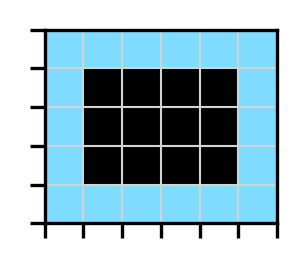

In [25]:
## Create Hollow Shape 

x = np.array([[1, 1, 1, 1, 1, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 0, 0, 0, 0, 1],
              [1, 1, 1, 1, 1, 1]])
s = Shape(x*8)
print(s.most_frequent_color)
plot_grid(s.as_shape_only_grid, size = (1,1))

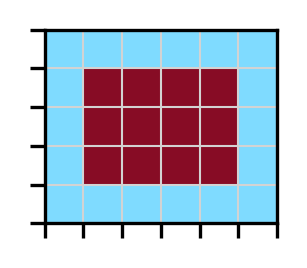

In [ ]:
from arcworld.conditionals.single_shape_conditionals import is_shape_hollow
import scipy
def fill_holes_different_color(shape): ## Fills hole with the first color
    if is_shape_hollow(shape):
        new_color = (shape.most_frequent_color % 9) + 1
        filled_shape = Shape(scipy.ndimage.binary_fill_holes(shape.grid).astype(int)*shape.colors[0])
        filling_diff = ((filled_shape.as_shape_only_grid - shape.as_shape_only_grid) != 0) * new_color
        return Shape(filling_diff + shape.as_shape_only_grid) 
    else:
        return shape
    

    
filled = fill_holes_different_color(s)
plot_grid(filled.as_shape_only_grid, size = (1,1))

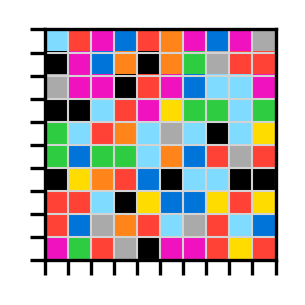

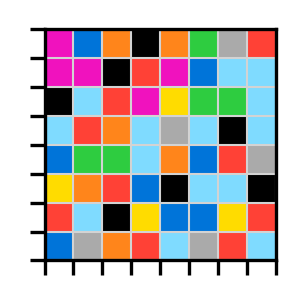

In [ ]:
# Create Multi colored shape 

constraints_crop_contours = {"incompatible_shapes": ["is_shape_less_than_4_rows",
                                                 "is_shape_less_than_4_cols"], 
                           "incompatible_transforms": [],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def crop_contours(shape):
    shape_original_pos = shape.current_position
    shape_grid = shape.as_shape_only_grid
    shape_grid = shape_grid[1:-1, 1:-1]
    new_shape = Shape(shape_grid)
    new_shape.move_to_position((shape_original_pos[0]+1, shape_original_pos[1]+1))
    return new_shape

x = np.random.randint(0, 9, (10, 10))
s = Shape(x)
plot_grid(s.as_shape_only_grid, size = (1,1))
changed = crop_contours(s)
plot_grid(changed.as_shape_only_grid, size = (1,1))

In [54]:
constraints_double_right = {"incompatible_shapes": [], 
                           "incompatible_transforms": ['translate_down'],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def double_right(shape):
    """Doubles the shape to the right"""
    new_shape = np.zeros((shape.n_rows, shape.n_cols*2))
    new_shape[:, :shape.n_cols] = shape.as_shape_only_grid
    new_shape[:, shape.n_cols:] = shape.as_shape_only_grid
    return Shape(new_shape)

constraints_double_down = {"incompatible_shapes": [], 
                           "incompatible_transforms": ['translate_down'],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def double_down(shape):
    """Doubles the shape down"""
    new_shape = np.zeros((shape.n_rows*2, shape.n_cols))
    new_shape[:shape.n_rows, :] = shape.as_shape_only_grid
    new_shape[shape.n_rows:, :] = shape.as_shape_only_grid
    return Shape(new_shape)

constraints_double_up = {"incompatible_shapes": [], 
                           "incompatible_transforms": ['translate_down'],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def double_up(shape):
    """Doubles the shape up"""
    new_shape = np.zeros((shape.n_rows*2, shape.n_cols))
    new_shape[shape.n_rows:, :] = shape.as_shape_only_grid
    new_shape[:shape.n_rows, :] = shape.as_shape_only_grid
    return Shape(new_shape)

constraints_double_left = {"incompatible_shapes": [], 
                           "incompatible_transforms": ['translate_down'],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def double_left(shape):
    """Doubles the shape to the left"""
    new_shape = np.zeros((shape.n_rows, shape.n_cols*2))
    new_shape[:, :shape.n_cols] = shape.as_shape_only_grid
    new_shape[:, shape.n_cols:] = shape.as_shape_only_grid
    return Shape(new_shape)


constraints_double_shape = {"incompatible_shapes": [], 
                           "incompatible_transforms": ['translate_down'],
                           "application_order": [],
                           "can_be_applied_multiple_times": True,
                           }  

def double_shape(shape):
    """Doubles the shape to the right"""
    new_shape = np.zeros((shape.n_rows*2, shape.n_cols*2))
    new_shape[:shape.n_rows, :shape.n_cols] = shape.as_shape_only_grid
    new_shape[shape.n_rows:, :shape.n_cols] = shape.as_shape_only_grid
    new_shape[:shape.n_rows, shape.n_cols:] = shape.as_shape_only_grid
    new_shape[shape.n_rows:, shape.n_cols:] = shape.as_shape_only_grid
    return Shape(new_shape)




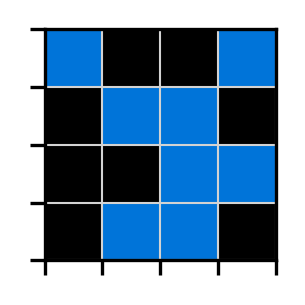

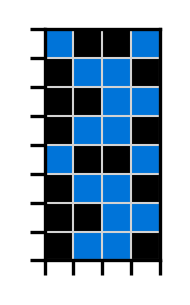

In [60]:
x = np.random.randint(0, 2, (4, 4))
s = Shape(x)
plot_grid(s.as_shape_only_grid, size = (1,1))
s = double_down(s)
plot_grid(s.as_shape_only_grid, size = (1,1))

In [10]:
from arcworld.general_utils import generate_key
import os
import numpy as np
from tqdm import tqdm
import copy
import json
from utils.db_utils import access_db, close_db, store_task_in_db, hash_task
from generator import generator
from study_configs.compositionality import compositionality_configs
from study_configs.generalization import generalization_configs

In [14]:
cursor, conn = access_db("before_arc_datasets_compositionality_exp_setting_3_experiment_1.db", 
                         "before_arc_datasets/compositionality/exp_setting_3/experiment_1")

# check length of the table
cursor.execute("SELECT COUNT(*) FROM tasks")
n_tasks = cursor.fetchone()[0]
print(f"Number of tasks in the database: {n_tasks}")

# convert the table to a pandas dataframe and print it

import pandas as pd
df = pd.read_sql_query("SELECT * FROM tasks", conn)
print(df.head())
print(df.columns)
print(df.shape)

Number of tasks in the database: 7500
   i   task_key                                          task_hash  \
0  1  7ggg5z0b1  162a2f8bb80f6748cd85b1c7d40519b70fa5049015bd41...   
1  2  ij2g12zyj  bb00fcdabdee29a5f833e5d8ea54138c2ca41eb8805e1f...   
2  3  3x6on5lq9  d2ff5191a692d5e0ada19703ff394dd34128c31d09bc04...   
3  4  ltjuwtwx4  566fb8c6d28326d21171f63d0ed187c601d39132458c92...   
4  5  wxrq5598u  4ba7c27d82128e14d86c5c033dce36fd1ce81111541920...   

                    transformations  
0  ['translate_up', 'translate_up']  
1  ['translate_up', 'translate_up']  
2  ['translate_up', 'translate_up']  
3  ['translate_up', 'translate_up']  
4  ['translate_up', 'translate_up']  
Index(['i', 'task_key', 'task_hash', 'transformations'], dtype='object')
(7500, 4)


In [15]:
# check for duplicates in the task_hash column
duplicates = df[df.duplicated(subset=['task_hash'])]
print(f"Number of duplicates in the task_hash column: {len(duplicates)}")

Number of duplicates in the task_hash column: 0


In [13]:
int(1000/3)

333